In [2]:
import pickle
import numpy as np

In [3]:


with open('./vit_base.pkl', 'rb') as f:
    vit_slopes = pickle.load(f)

with open('./vgg16.pkl', 'rb') as f:
    vgg_slopes = pickle.load(f)
    
with open('./vit_base_layers.pkl', 'rb') as f:
    vit_layers = pickle.load(f)

with open('./vgg16_layers.pkl', 'rb') as f:
    vgg_layers = pickle.load(f)

In [4]:
vit_pair_slopes, vit_triplet_slopes = vit_slopes

vgg_pair_slopes, vgg_triplet_slopes = vgg_slopes

In [5]:
vit_active_layers, vit_active_layer_inds = vit_layers

vgg_active_layers, vgg_active_layer_inds = vgg_layers

In [7]:
reference_pair=0.5
reference_pair_name='Zoccolan et. al. 2005, pairs'
reference_triplet=0.33
reference_triplet_name='Zoccolan et. al. 2005, triplets'

In [13]:
vgg_pair_slopes

array([1.        ,        nan,        nan, 0.90179361,        nan,
              nan,        nan, 0.93127464, 0.99981376,        nan,
              nan, 0.94175628,        nan, 1.00021411, 0.87730731,
       0.91940485,        nan, 0.78269921, 0.45598391,        nan,
       0.99589153, 0.87649559,        nan, 0.98776661, 0.90942708,
       0.81838985, 0.9883788 , 0.77053625, 0.87945852, 0.99745556,
       0.79227279, 0.89369402,        nan,        nan, 0.90736118,
       0.90335647, 0.96725366, 0.82233008, 0.89507392,        nan,
              nan, 0.86400221, 0.90906795, 0.89795698, 0.71653728,
       0.78367624, 0.68050575, 0.71144556, 0.71144556, 0.71144556,
       0.63018633, 0.63018633])

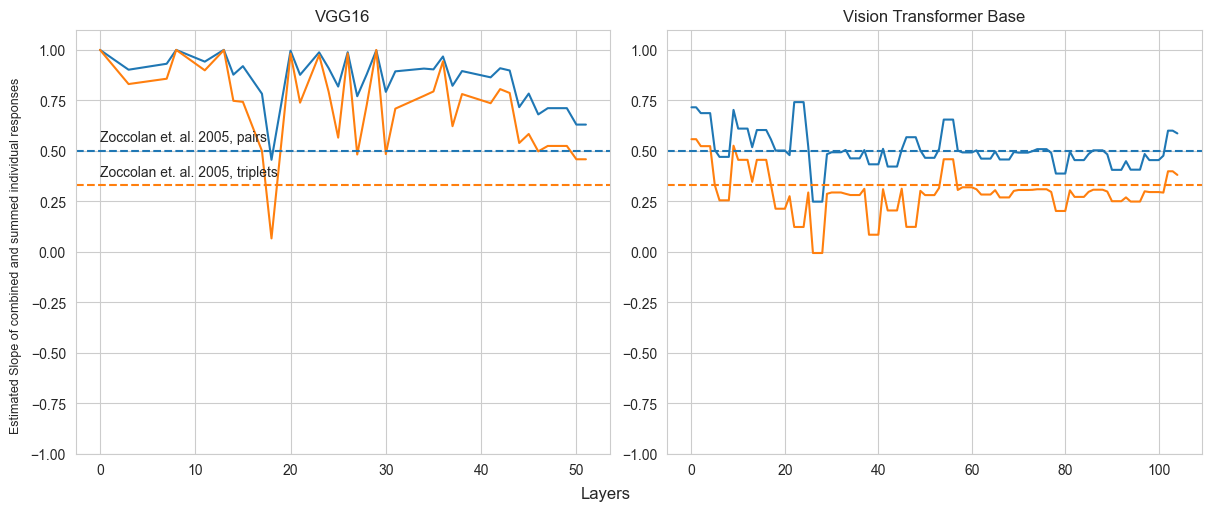

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 5))

ax1_layer_inds = np.arange(len(vgg_pair_slopes))
l1 = sns.lineplot(x=ax1_layer_inds, y=vgg_pair_slopes, ax=ax1)
l2 = sns.lineplot(x=ax1_layer_inds, y=vgg_triplet_slopes, ax=ax1)
ax1.axhline(y=reference_pair, color=colors[0], linestyle='--')
ax1.text(0, reference_pair+0.1, reference_pair_name, verticalalignment='top', horizontalalignment='left')
ax1.axhline(y=reference_triplet, color=colors[1], linestyle='--')
ax1.text(0, reference_triplet+0.1, reference_triplet_name, verticalalignment='top', horizontalalignment='left')
ax1.set_ylim(-1,1.1)
ax1.set_title('VGG16')

ax2_layer_inds = vit_active_layer_inds
l3 = sns.lineplot(x=ax2_layer_inds, y=vit_pair_slopes, ax=ax2)
l4 = sns.lineplot(x=ax2_layer_inds, y=vit_triplet_slopes, ax=ax2)
ax2.axhline(y=reference_pair, color=colors[0], linestyle='--')
# ax2.text(0, reference_pair+0.1, reference_pair_name, verticalalignment='top', horizontalalignment='left')
ax2.axhline(y=reference_triplet, color=colors[1], linestyle='--')
# ax2.text(0, reference_triplet+0.1, reference_triplet_name, verticalalignment='top', horizontalalignment='left')
ax2.set_ylim(-1,1.1)
ax2.set_title('Vision Transformer Base')

fig.supxlabel('Layers')
fig.supylabel("Estimated Slope of combined and summed individual responses", fontsize=9)

plt.show()

In [37]:
len(vit_active_layer_inds)

105